# 소성가공 품질보증 AI 데이터셋 분석

In [ ]:
# 1. 라이브러리 임포트
from internal.hprint import hprint
import numpy as np
import pandas	as pd
import seaborn as sns
import matplotlib.pyplot as	plt
from scipy import	stats	as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,	f1_score,	confusion_matrix,	precision_score,	recall_score
from sklearn.model_selection import KFold
from warnings import filterwarnings

### 데이터 로드

In [3]:
# 데이터 로드
path = 'data.csv'
df = pd.read_csv(path)
df

,date,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,2020 10 30 00:00:04,297,222,251,267,209,219,229,239,240,239,241,240,240,40,41,0.0000,71.2215,72,0.0
1,2020 10 30 00:00:09,297,222,251,268,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.2096,72,0.0
2,2020 10 30 00:00:14,297,222,251,267,210,219,229,239,240,239,240,240,240,40,41,0.0000,71.1977,72,0.0
3,2020 10 30 00:00:19,297,222,251,267,210,219,229,240,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
4,2020 10 30 00:00:24,297,222,251,267,210,219,229,239,240,239,241,240,240,40,41,0.0000,71.1977,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,2020 10 30 23:59:39,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8000,71.2096,72,NaN
17276,2020 10 30 23:59:44,296,222,252,267,215,220,230,240,240,240,240,240,240,40,42,2.8438,71.2096,72,NaN
17277,2020 10 30 23:59:49,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.1858,72,NaN
17278,2020 10 30 23:59:54,296,222,252,267,214,220,230,240,240,240,240,240,240,40,42,2.8875,71.2096,72,NaN


### 데이터 통계 요약 


데이터 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17280 non-null  object 
 1   EX5.MELT_TEMP  17280 non-null  int64  
 2   EX4.MELT_TEMP  17280 non-null  int64  
 3   EX3.MELT_TEMP  17280 non-null  int64  
 4   EX2.MELT_TEMP  17280 non-null  int64  
 5   EX1.Z1_PV      17280 non-null  int64  
 6   EX1.Z2_PV      17280 non-null  int64  
 7   EX1.Z3_PV      17280 non-null  int64  
 8   EX1.Z4_PV      17280 non-null  int64  
 9   EX1.A1_PV      17280 non-null  int64  
 10  EX1.A2_PV      17280 non-null  int64  
 11  EX1.H1_PV      17280 non-null  int64  
 12  EX1.H2_PV      17280 non-null  int64  
 13  EX1.H3_PV      17280 non-null  int64  
 14  EX1.H4_PV      17280 non-null  int64  
 15  EX1.H2O_PV     17280 non-null  int64  
 16  EX1.MELT_P_PV  17280 non-null  float64
 17  EX1.MD_PV      17280 non-null  float64
 

array([[<Axes: title={'center': 'EX5.MELT_TEMP'}>,
        <Axes: title={'center': 'EX4.MELT_TEMP'}>,
        <Axes: title={'center': 'EX3.MELT_TEMP'}>,
        <Axes: title={'center': 'EX2.MELT_TEMP'}>],
       [<Axes: title={'center': 'EX1.Z1_PV'}>,
        <Axes: title={'center': 'EX1.Z2_PV'}>,
        <Axes: title={'center': 'EX1.Z3_PV'}>,
        <Axes: title={'center': 'EX1.Z4_PV'}>],
       [<Axes: title={'center': 'EX1.A1_PV'}>,
        <Axes: title={'center': 'EX1.A2_PV'}>,
        <Axes: title={'center': 'EX1.H1_PV'}>,
        <Axes: title={'center': 'EX1.H2_PV'}>],
       [<Axes: title={'center': 'EX1.H3_PV'}>,
        <Axes: title={'center': 'EX1.H4_PV'}>,
        <Axes: title={'center': 'EX1.H2O_PV'}>,
        <Axes: title={'center': 'EX1.MELT_P_PV'}>],
       [<Axes: title={'center': 'EX1.MD_PV'}>,
        <Axes: title={'center': 'EX1.MD_TQ'}>,
        <Axes: title={'center': 'passorfail'}>, <Axes: >]], dtype=object)

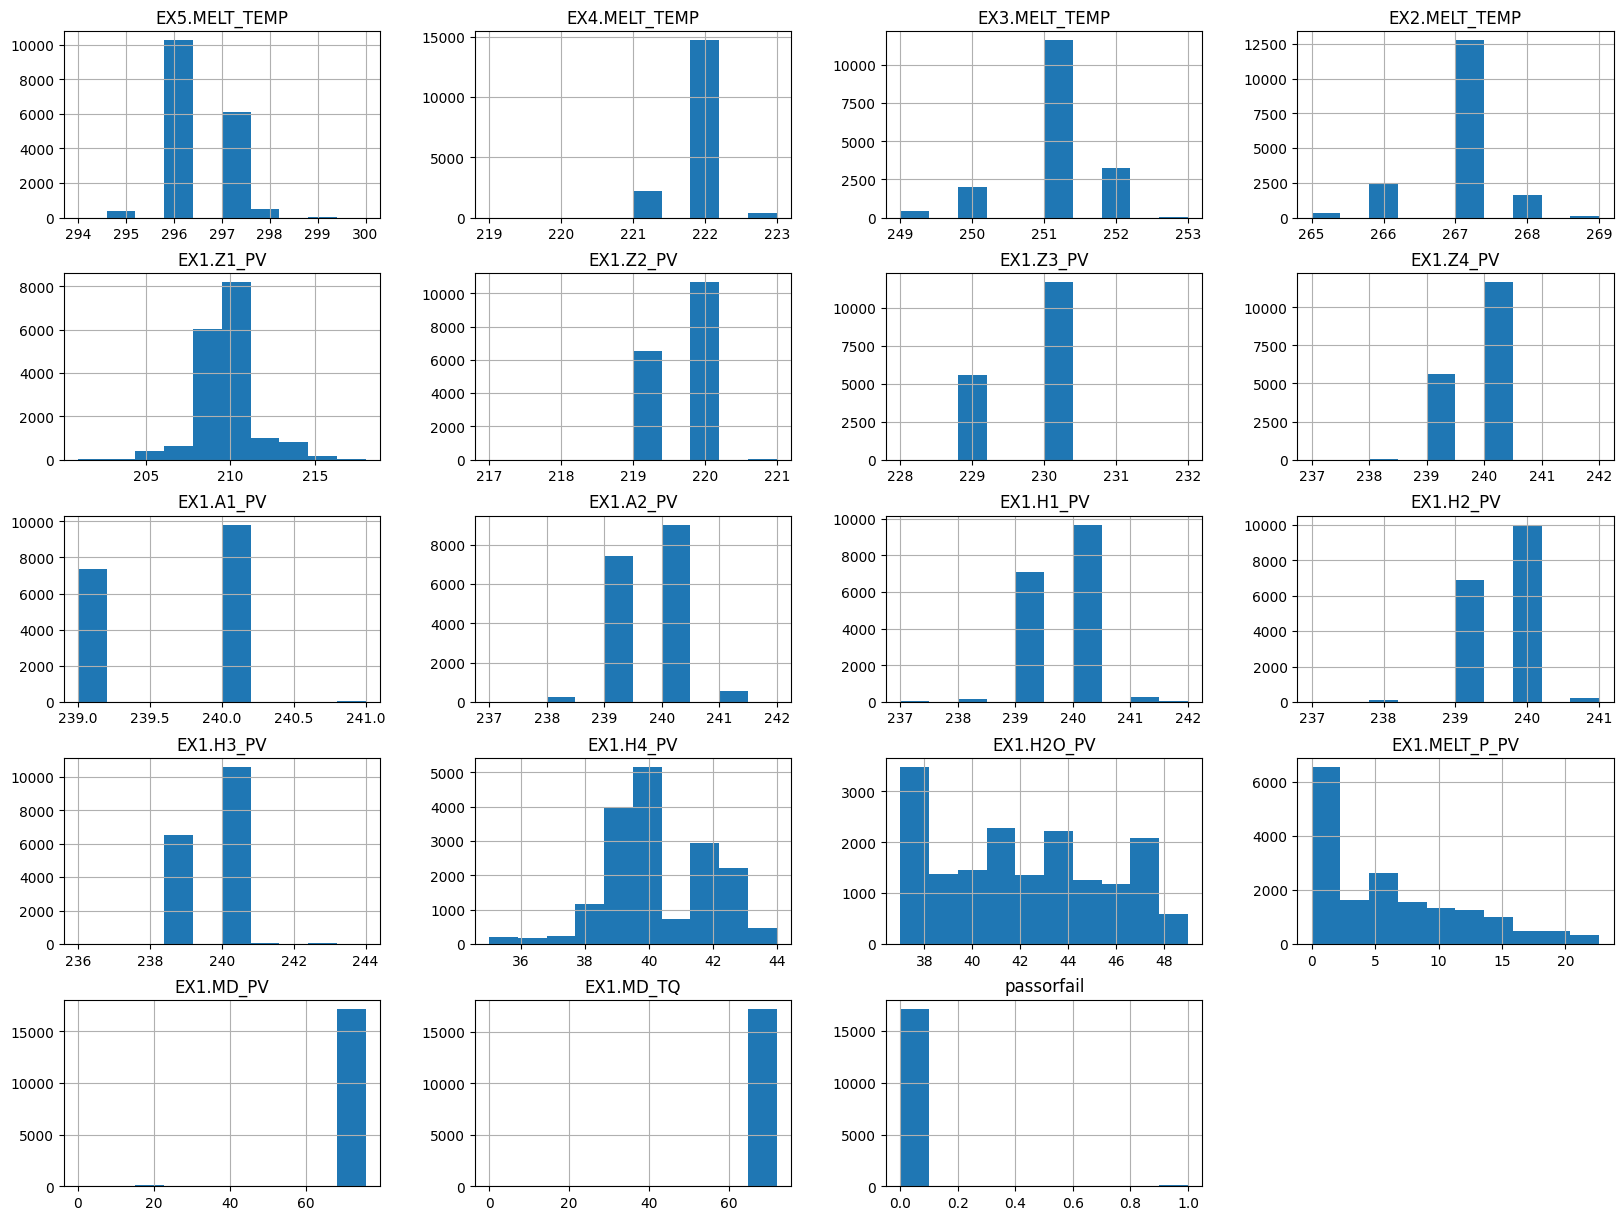

In [4]:
hprint("데이터 정보:")
print(df.info())
hprint("데이터 통계:")
print(df.describe().transpose())
hprint("데이터 분포:")
df.hist(bins=10, figsize=(20, 15))

### 데이터 전처리

c:\ML-Learn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: >

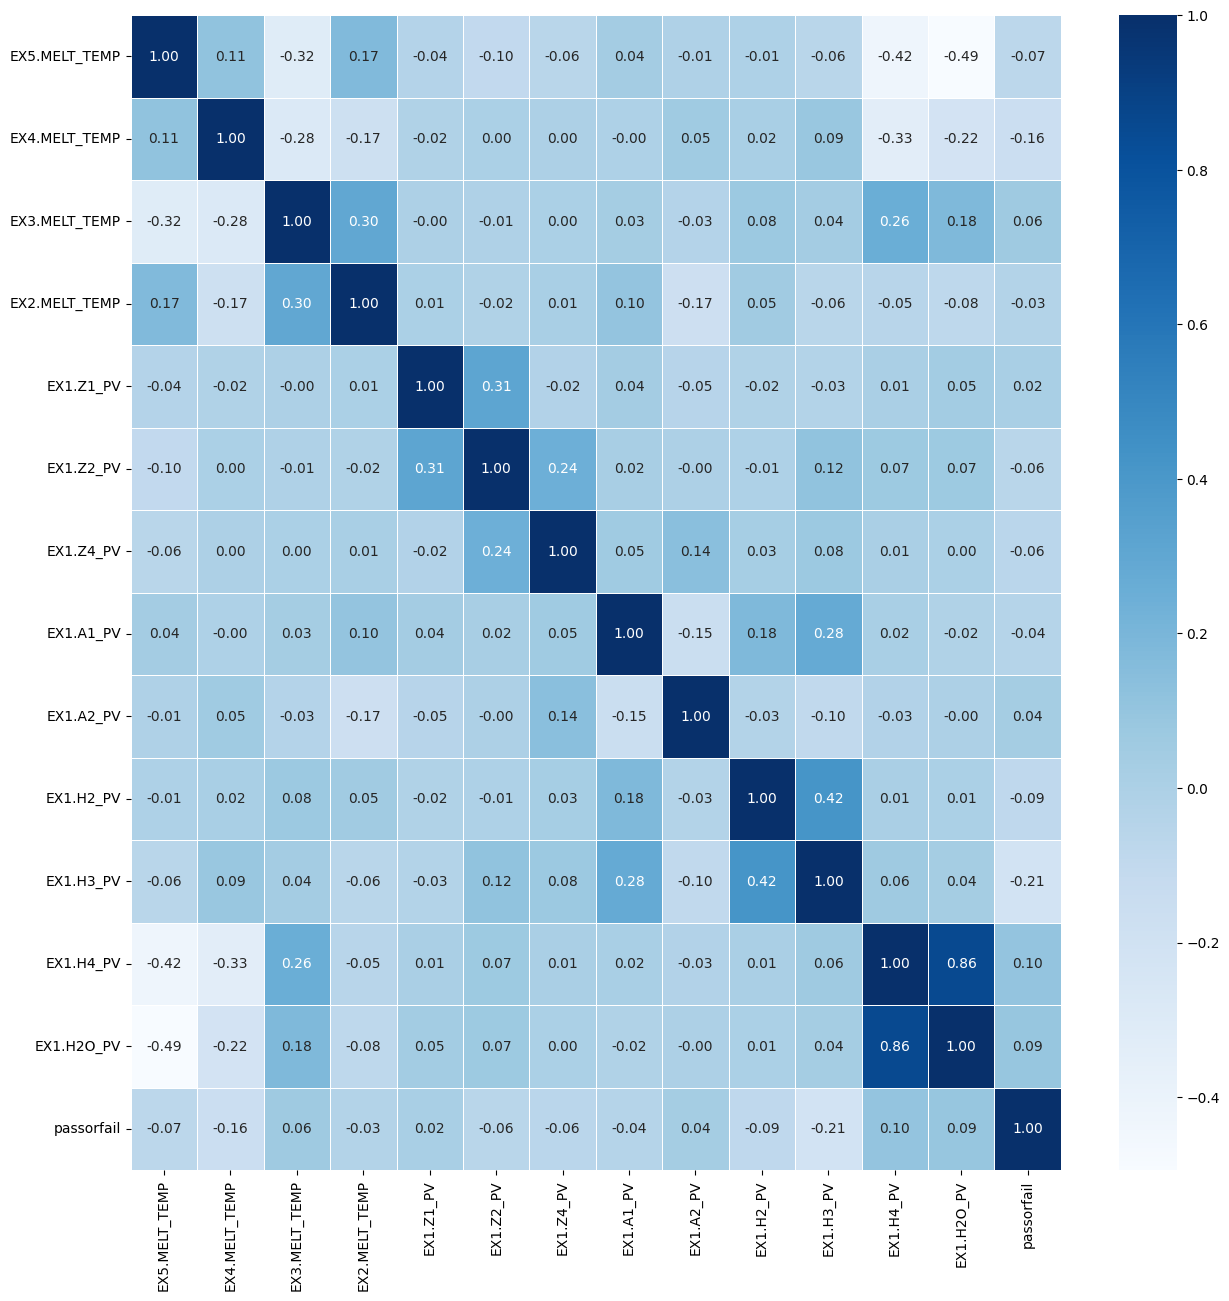

In [5]:
# 결측치 제거
df.isnull()
df = df.dropna()

# 불필요한 컬럼 제거
drop_cols = ['date', 'EX1.MELT_P_PV', 'EX1.MD_PV', 'EX1.MD_TQ']
df = df.drop(columns=drop_cols)

# 데이터 타입 변경
df = df.astype(float) # 전체 데이터를 float 타입으로 변경
df = df.astype({'passorfail':'float32'}) # passorfail 컬럼을 float 타입으로 변경

# 이상치 대체 (0.1%의 상/하한 값으로 대체)
for	col	in	df.columns[0:-1]:
    upper_bound	= np.percentile(df[col],	99.9)
    lower_bound	= np.percentile(df[col],	0.1)
    df.loc[df[col] > upper_bound, col] = upper_bound
    df.loc[df[col] < lower_bound, col] = lower_bound

# t-test
t_test = []
for	i, col in enumerate(df.columns):
    t =	stats.ttest_ind(df[df.passorfail==1][col],	df[df.passorfail==0][col],	equal_var=False)
    t_test.append([col,	t[0], t[1]])
df_ttest = pd.DataFrame(t_test,	columns=['col','tvalue', 'pvalue'])

t_list = []
for	i in range(len(df_ttest)):
    if df_ttest['pvalue'][i] <=	0.1:
        t_list.append(df_ttest['col'][i])
df3	= df.loc[:,	t_list]
df3

# 상관관계 시각화
plt.figure(figsize=(15,15))
sns.heatmap(data = df3.corr(), annot=True, fmt = '.2f',	linewidths=.5, cmap='Blues')

### 데이터 분할

In [6]:
#	독립 변수와 종속 변수 분리
data = df3.loc[:,list(df3.columns)[:-1]]
target = df3.loc[:,list(df3.columns)[-1]].astype(int)

#	학습용	데이터,	테스트	데이터의	비율은	8:2로	진행
X_train, X_test, y_train,	y_test = train_test_split(
  data,	
  target,	
  test_size=0.2,	
  shuffle=True,	
  stratify=target,
  random_state=42)
y_train, y_test =	np.array(y_train), np.array(y_test)

#	스케일러	적용
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
#	훈련	데이터에	스케일러	적용
X_train	= scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 모델 훈련

In [7]:
# DecisionTree 모델 훈련

kfold =	KFold(n_splits=3,	shuffle=True)
dt_kf_acc =	[]
dt = DecisionTreeClassifier()
n_iter = 0
for	train_idx, valid_idx in	kfold.split(X_train):
    X_train_, X_valid_ = X_train[train_idx], X_train[valid_idx]
    y_train_, y_valid_ = y_train[train_idx], y_train[valid_idx]
    dt.fit(X_train_, y_train_)
    dt_pred	= dt.predict(X_valid_)
    dt_acc = accuracy_score(dt_pred, y_valid_)
    n_iter += 1
    dt_kf_acc.append([n_iter, dt_acc, dt])
    print(f'KFold {n_iter} 교차검증	정확도 : {dt_acc}, 학습	데이터	크기:{X_train_.shape[0]}, 검증 데이터 크기:{y_train_.shape[0]}')

dt_kf_acc_sort = dt_kf_acc
dt_kf_acc_sort.sort(key=lambda x : x[1], reverse=True)
t =	dt_kf_acc_sort[0][2]
print(f'교차검증 중	가장 높은 정확도 : KFold {dt_kf_acc_sort[0][0]}, {dt_kf_acc_sort[0][1]}')


KFold 1 교차검증	정확도 : 0.9971763683753258, 학습	데이터	크기:9207, 검증 데이터 크기:9207
KFold 2 교차검증	정확도 : 0.998262380538662, 학습	데이터	크기:9207, 검증 데이터 크기:9207
KFold 3 교차검증	정확도 : 0.9976102541820552, 학습	데이터	크기:9208, 검증 데이터 크기:9208
교차검증 중	가장 높은 정확도 : KFold 2, 0.998262380538662


In [8]:
# RandomForest 모델 훈련

kfold =	KFold(n_splits=3,	shuffle=True)
rf_kf_acc =	[]
rf = RandomForestClassifier(random_state=42)
n_iter = 0
for	train_idx, valid_idx in	kfold.split(X_train):
    X_train_, X_valid_ = X_train[train_idx], X_train[valid_idx]
    y_train_, y_valid_ = y_train[train_idx], y_train[valid_idx]
    rf.fit(X_train_, y_train_)
    rf_pred	= rf.predict(X_valid_)
    rf_acc = accuracy_score(rf_pred,	y_valid_)
    n_iter += 1
    rf_kf_acc.append([n_iter, rf_acc, rf])
    print(f'KFold {n_iter} 교차검증	정확도 : {rf_acc}, 학습	데이터 크기:{X_train_.shape[0]}, 검증 데이터 크기:{y_train_.shape[0]}')

rf_kf_acc_sort = rf_kf_acc
rf_kf_acc_sort.sort(key=lambda x : x[1], reverse=True)
rf = rf_kf_acc_sort[0][2]
print(f'교차검증 중	가장 높은 정확도 : KFold {rf_kf_acc_sort[0][0]}, {rf_kf_acc_sort[0][1]}')

KFold 1 교차검증	정확도 : 0.9980451781059948, 학습	데이터 크기:9207, 검증 데이터 크기:9207
KFold 2 교차검증	정확도 : 0.9984795829713293, 학습	데이터 크기:9207, 검증 데이터 크기:9207
KFold 3 교차검증	정확도 : 0.9986965022811211, 학습	데이터 크기:9208, 검증 데이터 크기:9208
교차검증 중	가장 높은 정확도 : KFold 3, 0.9986965022811211


In [9]:
# AdaBoost 모델	훈련

kfold =	KFold(n_splits=3,	shuffle=True)
ada_kf_acc = []
ada	= AdaBoostClassifier(random_state=42)
n_iter = 0
for	train_idx, valid_idx in	kfold.split(X_train):
    X_train_, X_valid_ = X_train[train_idx], X_train[valid_idx]
    y_train_, y_valid_ = y_train[train_idx], y_train[valid_idx]
    ada.fit(X_train_, y_train_)
    ada_pred = dt.predict(X_valid_)
    ada_acc	= accuracy_score(ada_pred, y_valid_)
    n_iter += 1
    ada_kf_acc.append([n_iter, ada_acc,	ada])
    print(f'KFold {n_iter} 교차검증	정확도 : {ada_acc},	학습 데이터	크기: {X_train_.shape[0]}, 검증	데이터 크기:{y_train_.shape[0]}')

ada_kf_acc_sort	= ada_kf_acc
ada_kf_acc_sort.sort(key=lambda x : x[1], reverse=True)
ada	= ada_kf_acc_sort[0][2]
print(f'교차검증 중	가장 높은 정확도 : KFold {ada_kf_acc_sort[0][0]}, {ada_kf_acc_sort[0][1]}')

KFold 1 교차검증	정확도 : 0.9986967854039965,	학습 데이터	크기: 9207, 검증	데이터 크기:9207
KFold 2 교차검증	정확도 : 0.9986967854039965,	학습 데이터	크기: 9207, 검증	데이터 크기:9207
KFold 3 교차검증	정확도 : 0.9986965022811211,	학습 데이터	크기: 9208, 검증	데이터 크기:9208
교차검증 중	가장 높은 정확도 : KFold 1, 0.9986967854039965


In [10]:
# 모든 Fold	별 결과	확인
total_fold_df =	pd.DataFrame({
    'Decision Tree':[ada_kf_acc[0][1], ada_kf_acc[1][1], ada_kf_acc[2][1]],	
    'Random Forest':[rf_kf_acc[0][1], rf_kf_acc[1][1], rf_kf_acc[2][1]],	
    'Adaboost':[ada_kf_acc[0][1], ada_kf_acc[1][1],	ada_kf_acc[2][1]]},
index=['Fold1',	'Fold2', 'Fold3'])
total_fold_df

,Decision Tree,Random Forest,Adaboost
Fold1,0.998697,0.998697,0.998697
Fold2,0.998697,0.998480,0.998697
Fold3,0.998697,0.998045,0.998697


### 모델 평가

DecisionTreeClassifier()
precision: 0.9047619047619048	recall:	0.8636363636363636
F1-Score:	0.8837209302325582	Accuracy:	0.9985519837822183


c:\ML-Learn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


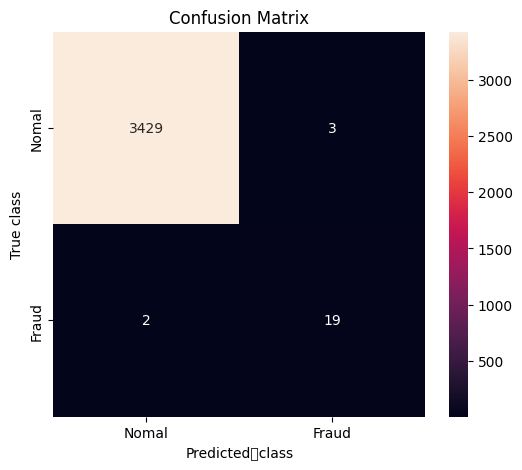

In [11]:
#	Descision	Tree	모델	평가
dt_pred =	dt.predict(X_test)
dt_pred	=	np.choose(dt_pred, [0,	1]).astype(float)
result = {}
dt_precision = precision_score(y_test, dt_pred)
dt_recall	=	recall_score(y_test, dt_pred)
dt_f1	=	f1_score(y_test, dt_pred)
dt_acc = accuracy_score(dt_pred,	y_test)
dt_cm	=	confusion_matrix(dt_pred,	y_test)
result['DecisionTree'] = {'precision':dt_precision,	'recall':dt_recall,	'f1-score':dt_f1,	'accuracy':dt_acc}
print(f'{dt}\nprecision: {dt_precision}	recall:	{dt_recall}\nF1-Score:	{dt_f1}	Accuracy:	{dt_acc}')
plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, xticklabels=['Nomal', 'Fraud'],	yticklabels=['Nomal',	'Fraud'],	annot=True,	fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted	class')
plt.show()

RandomForestClassifier(random_state=42)
precision: 1.0	recall:	1.0
F1-Score:	1.0	Accuracy:	1.0


c:\ML-Learn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


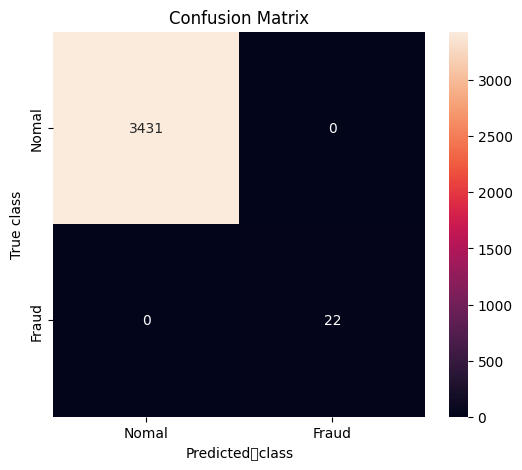

In [12]:
#	RandomForest	모델	평가
rf_pred	=	rf.predict(X_test)
rf_pred	=	np.choose(rf_pred,	[0,	1]).astype(float)
rf_precision = precision_score(y_test,	rf_pred)
rf_recall	=	recall_score(y_test,	rf_pred)
rf_f1	=	f1_score(y_test,	rf_pred)
rf_acc = accuracy_score(rf_pred,	y_test)
rf_cm	=	confusion_matrix(rf_pred,	y_test)
result['RandomForest'] = {'precision':rf_precision,	'recall':rf_recall,	'f1-score':rf_f1,	'accuracy':rf_acc}
print(f'{rf}\nprecision: {rf_precision}	recall:	{rf_recall}\nF1-Score:	{rf_f1}	Accuracy:	{rf_acc}')
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, xticklabels=['Nomal', 'Fraud'],	yticklabels=['Nomal',	'Fraud'],	annot=True,	fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted	class')
plt.show()

AdaBoostClassifier(random_state=42)
precision:	1.0	recall:	0.6818181818181818
F1-Score:	0.8108108108108109	Accuracy:	0.9979727772951057


c:\ML-Learn\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


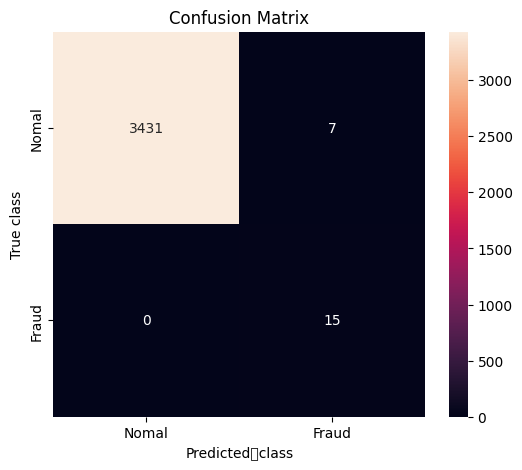

In [13]:
#	AdaBoost	모델	평가
ada_pred = ada.predict(X_test)
ada_pred = np.choose(ada_pred,	[0,	1]).astype(float)
ada_precision	=	precision_score(y_test,	ada_pred)
ada_recall = recall_score(y_test,	ada_pred)
ada_f1 = f1_score(y_test,	ada_pred)
ada_acc	=	accuracy_score(ada_pred, y_test)
ada_cm = confusion_matrix(ada_pred, y_test)
result['AdaBoost'] = {'precision':ada_precision, 'recall':ada_recall,	'f1-score':ada_f1, 'accuracy':ada_acc}
print(f'{ada}\nprecision:	{ada_precision}	recall:	{ada_recall}\nF1-Score:	{ada_f1}	Accuracy:	{ada_acc}')
plt.figure(figsize=(6, 5))
sns.heatmap(ada_cm,	xticklabels=['Nomal',	'Fraud'],	yticklabels=['Nomal',	'Fraud'],	annot=True,	fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted	class')
plt.show()

In [14]:
#	모델별	학습	결과	출력
pd.DataFrame(result).T

,precision,recall,f1-score,accuracy
DecisionTree,0.904762,0.863636,0.883721,0.998552
RandomForest,1.000000,1.000000,1.000000,1.000000
AdaBoost,1.000000,0.681818,0.810811,0.997973
